# Initial data exploration

### Overview

* This notebook carries out initial exploration and cleaning of the three main datasets:
    1. NYC graffiti report
        - https://data.cityofnewyork.us/City-Government/DSNY-Graffiti-Tracking-Map-/v9sd-nunw
        - data in a GeoJSON file:
            - `../data/manhattan_graffiti_2022.geojson`
    2. NYPD complaints data
        - https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Map-Year-to-Date-/2fra-mtpn
        - filtered for Manhattan and 2022
        - data file:
            - `../data/manhattan_complaint_data_2022.csv`
            
    3. NY Protected Streets data
        - https://nycstreets.net/PavementWorks/Location/ProtectedStreetLocations
        - https://data.cityofnewyork.us/Transportation/Protected-Streets-Segments/9p9k-tusd/data?no_mobile=true
        - Map in GeoJSON
            - `../data/manhattan_protected_streets.geojson`

### Setup

In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Load the data sets

### 1. Graffiti dataset

* Source: [https://data.cityofnewyork.us/City-Government/DSNY-Graffiti-Tracking-Map-/v9sd-nunw]



In [46]:
graffiti_gdf = gpd.read_file('../data/manhattan_graffiti_2022.geojson')

In [47]:
graffiti_gdf.shape

(3160, 43)

* 3160 rows (observations)
* 43 columns (variables)


Take a random sample of 50 rows to get a sense of the data

In [48]:
graffiti_gdf.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'date', 'geometry'],
      dtype='object')

In [49]:
graffiti_gdf.sample(50)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,date,geometry
2703,56312905,12/21/2022 08:46:59 AM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10002.0,158 EAST BROADWAY,...,None,None,None,None,None,40.714035,-73.990499,"(40.71403543934201, -73.99049860506918)",2022-12-21T08:46:59,POINT (-73.99050 40.71404)
2481,55362902,09/10/2022 01:00:43 PM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10018.0,450 WEST 37 STREET,...,None,None,None,None,None,40.756058,-73.996759,"(40.75605796060075, -73.99675868059943)",2022-09-10T13:00:43,POINT (-73.99676 40.75606)
2239,55895812,11/04/2022 09:57:48 PM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,None,10002.0,83 CHRYSTIE STREET,...,None,None,None,None,None,40.717425,-73.994225,"(40.7174254660163, -73.9942245607518)",2022-11-04T21:57:48,POINT (-73.99422 40.71743)
673,53602279,03/09/2022 08:02:52 AM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10003.0,259 1 AVENUE,...,None,None,None,None,None,40.732081,-73.981905,"(40.73208119340303, -73.98190493548402)",2022-03-09T08:02:52,POINT (-73.98190 40.73208)
2783,56317966,12/21/2022 08:58:46 AM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10002.0,10 LUDLOW STREET,...,None,None,None,None,None,40.715059,-73.990924,"(40.71505926957695, -73.99092411661069)",2022-12-21T08:58:46,POINT (-73.99092 40.71506)
2863,55288989,09/02/2022 01:53:57 PM,03/23/2023 10:45:25 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Graffiti or Vandalism,Park,10009.0,144 AVENUE A,...,None,None,None,None,None,40.727168,-73.982711,"(40.72716820472698, -73.98271083621445)",2022-09-02T13:53:57,POINT (-73.98271 40.72717)
3152,53279575,02/04/2022 11:56:24 AM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,None,10009.0,154 1 AVENUE,...,None,None,None,None,None,40.728398,-73.984684,"(40.728398134912844, -73.98468408707379)",2022-02-04T11:56:24,POINT (-73.98468 40.72840)
1368,54323441,05/30/2022 06:20:11 PM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10003.0,2 WASHINGTON PLACE,...,None,None,None,None,None,40.729060,-73.993874,"(40.72906047669992, -73.9938735739637)",2022-05-30T18:20:11,POINT (-73.99387 40.72906)
913,53763971,03/28/2022 09:55:18 AM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10011.0,184 7 AVENUE,...,None,None,None,None,None,40.742727,-73.996655,"(40.74272671700521, -73.996654674991)",2022-03-28T09:55:18,POINT (-73.99665 40.74273)
1850,55204372,08/25/2022 11:22:21 AM,None,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10031.0,3414 BROADWAY,...,None,None,None,None,None,40.822466,-73.953333,"(40.822465574041985, -73.95333333833828)",2022-08-25T11:22:21,POINT (-73.95333 40.82247)


In [50]:
print('1. ' + '\n1. '.join([f'`{n}`' for n in graffiti_gdf.columns]))

1. `Unique Key`
1. `Created Date`
1. `Closed Date`
1. `Agency`
1. `Agency Name`
1. `Complaint Type`
1. `Descriptor`
1. `Location Type`
1. `Incident Zip`
1. `Incident Address`
1. `Street Name`
1. `Cross Street 1`
1. `Cross Street 2`
1. `Intersection Street 1`
1. `Intersection Street 2`
1. `Address Type`
1. `City`
1. `Landmark`
1. `Facility Type`
1. `Status`
1. `Due Date`
1. `Resolution Description`
1. `Resolution Action Updated Date`
1. `Community Board`
1. `BBL`
1. `Borough`
1. `X Coordinate (State Plane)`
1. `Y Coordinate (State Plane)`
1. `Open Data Channel Type`
1. `Park Facility Name`
1. `Park Borough`
1. `Vehicle Type`
1. `Taxi Company Borough`
1. `Taxi Pick Up Location`
1. `Bridge Highway Name`
1. `Bridge Highway Direction`
1. `Road Ramp`
1. `Bridge Highway Segment`
1. `Latitude`
1. `Longitude`
1. `Location`
1. `date`
1. `geometry`


#### Understanding Each Variable


1. `Unique Key` - unique identifying code for case
1. `Created Date` - when the report was made
1. `Closed Date` - when the case was terminated
1. `Agency` - abbreviation for agency case was filed to
1. `Agency Name` - name of agency case was filed to
1. `Complaint Type` - type of complaint filed
1. `Descriptor` - description of complaint filed
1. `Location Type` - categorization of location where incident occurred
1. `Incident Zip` - digits of the zip code where incident occurred
1. `Incident Address` - address of incident
1. `Street Name` - name of street of incident
1. `Cross Street 1` - first cross street of incident
1. `Cross Street 2` - second cross street of incident
1. `Intersection Street 1` - first intersection street of incident
1. `Intersection Street 2` - second intersection street of incident
1. `Address Type` - classification of address of incident 
1. `City` - city of incident 
1. `Landmark` - landmark if related to incident
1. `Facility Type` - type of facility 
1. `Status` - status of case
1. `Due Date` - N/A
1. `Resolution Description` - description of the resolution
1. `Resolution Action Updated Date` - date of resolution action
1. `Community Board` - Manhattan has 12 community boards, which group multiple neighborhoods
1. `BBL` -  stands for Borough-Block-Lot:parcel numbers that identify the location of buildings or properties
1. `Borough` - 5 boroughs of NYC, focusing on Manhattan for project
1. `X Coordinate (State Plane)` - a value on the horizontal axis describing the location of the incident
1. `Y Coordinate (State Plane)`- a value on the vertical axis describing the location of the incident 
1. `Open Data Channel Type`
1. `Park Facility Name` - name of park facility
1. `Park Borough` - 5 boroughs of NYC, only focusing on Manhattan for project
1. `Vehicle Type` - N/A
1. `Taxi Company Borough` - N/A
1. `Taxi Pick Up Location` - N/A
1. `Bridge Highway Name` - N/A
1. `Bridge Highway Direction` - N/A
1. `Road Ramp` - N/A
1. `Bridge Highway Segment` - N/A
1. `Latitude` - the angular distance of a place north or south of the earth's equator
1. `Longitude` - the angular distance of a place east or west of the meridian
1. `Location` - latitude and longitude point of incident
1. `date` - date complaint recorded
1. `geometry` - latitude and longitude point of incident

#### Exploring the distribution of values

* Work through each of the variables and look at the distribution of values
* It looks like the location ones are categorical data so can use the `.value_counts()` function

In [51]:
graffiti_gdf['Borough'].value_counts(dropna=False)

MANHATTAN    3160
Name: Borough, dtype: int64

* These data only cover `MANHATTAN` and none of the other boroughs. This was a deliberate decision so that we could make a huge data set much more digestible. This way, it will be easier to analyze trends.

In [52]:
graffiti_gdf['Community Board'].value_counts(dropna=False)

03 MANHATTAN             794
02 MANHATTAN             419
04 MANHATTAN             329
08 MANHATTAN             245
06 MANHATTAN             240
05 MANHATTAN             186
12 MANHATTAN             184
09 MANHATTAN             172
10 MANHATTAN             166
11 MANHATTAN             153
07 MANHATTAN             124
01 MANHATTAN             117
64 MANHATTAN              28
Unspecified MANHATTAN      3
Name: Community Board, dtype: int64

This distribution shows the number of reported graffiti incidents in each community board area. See above for the definition of a community board. The community board with the most reported cases of graffiti, community board 3, is comprised of Tompkins Square, East Village, Lower East Side, Chinatown, and Two Bridges. This overlaps with police precincts 5, 7, and 9. 

- See: [https://www.nyc.gov/site/cau/community-boards/manhattan-boards.page]

- Unsurprising given the information above, the precincts with the highest number of reports are precincts 5, 7, and 9. Precinct 9, home to the East Village, and Tompkins Square Park, had the most overall reports at 138.
    - See: [https://www.nyc.gov/site/nypd/bureaus/patrol/precincts/9th-precinct.page]

In [54]:
graffiti_gdf['Incident Zip'].value_counts(dropna=False)

10002.0    459
10013.0    229
10009.0    213
10003.0    178
10011.0    159
10001.0    134
10012.0    132
10031.0    129
10019.0    118
10016.0    106
10029.0     99
10027.0     90
10025.0     90
10014.0     79
10021.0     76
10026.0     57
10022.0     57
10028.0     57
10032.0     52
10033.0     51
10036.0     50
10075.0     46
10010.0     46
10040.0     45
10017.0     43
10128.0     42
10065.0     41
10034.0     39
10035.0     36
10030.0     31
10038.0     28
10018.0     27
10039.0     22
10024.0     21
10007.0     21
10023.0     18
10037.0     17
10004.0     10
10005.0      3
10000.0      2
10282.0      1
10069.0      1
10169.0      1
10170.0      1
10281.0      1
10280.0      1
10006.0      1
Name: Incident Zip, dtype: int64

* Note 17 observations with no zipcode recorded (`NaN`)

In [55]:
graffiti_gdf['Status'].value_counts(dropna=False)

Closed         1646
Open           1511
In Progress       2
Pending           1
Name: Status, dtype: int64

- Majority of cases are either opened or closed, with slightly more cases being closed. While these cases were from 2022, it makes sense that nearly half of them are still opened since graffiti is a low stakes crime, and it is extremely difficult to catch the culprit.

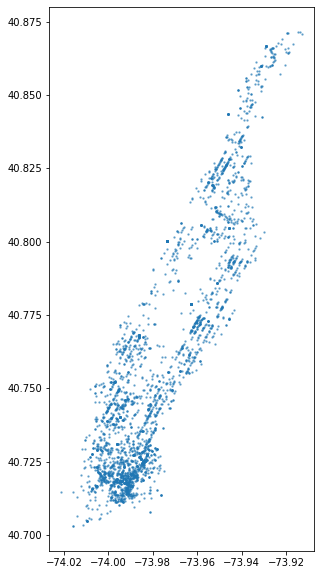

In [56]:
graffiti_gdf.plot(figsize=(10,10),
                 markersize=2, alpha=0.5)
plt.show()

* Though this graph does not show the map of Manhattan below it, using my knowledge of the city, I can tell that the space in the middle is Central Park and the densest tip is the lower tip of Manhattan.


### Some Manhattan maps

* https://github.com/codeforgermany/click_that_hood/blob/main/public/data/manhattan.geojson
* https://github.com/ResidentMario/geoplot-data/blob/master/nyc-police-precincts.geojson

Importing maps so that we can get the outline according to neighborhoods and precincts for better understanding of the data points above!

In [57]:
manhattan_gdf=gpd.read_file('../data/manhattan.geojson')

In [58]:
manhattan_gdf.shape

(37, 5)

- So, there are 37 neighborhoods in Manhattan

In [59]:
manhattan_gdf

,cartodb_id,name,created_at,updated_at,geometry
0,9,Battery Park City,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.01375 40.71369, -74.01426 ..."
1,50,Central Park,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.94966 40.79707, -73.94964 ..."
2,52,Chelsea,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99346 40.75219, -73.98794 ..."
3,54,Chinatown,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99999 40.71798, -73.99864 ..."
4,57,Civic Center,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99799 40.71272, -73.99777 ..."
5,84,East Harlem,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.93383 40.81952, -73.93383 ..."
6,87,East Village,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.99070 40.73478, -73.98255 ..."
7,91,Ellis Island,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.04166 40.69645, -74.04367 ..."
8,98,Financial District,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-74.01375 40.71369, -74.00861 ..."
9,100,Flatiron District,2014-03-09T19:11:53+00:00,2014-03-09T19:11:53+00:00,"MULTIPOLYGON (((-73.98338 40.74137, -73.98474 ..."


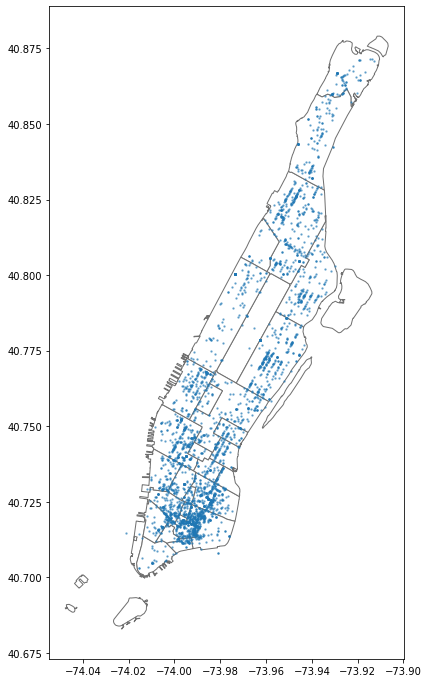

In [60]:
fig, ax = plt.subplots(figsize=(10,12))
base=manhattan_gdf.plot(color='white', edgecolor='#707070', ax=ax)
graffiti_gdf.plot(ax=base, markersize=2, alpha=0.5)
plt.show()

- By depicting the neighborhoods, now we can get a better feel for which neighborhoods in Manhattan have greater reported incidents of graffiti

In [61]:
graffiti_gdf.shape

(3160, 43)

In [62]:
graffiti_by_district_gdf = gpd.sjoin(graffiti_gdf,
                              manhattan_gdf)

In [63]:
graffiti_by_district_cnt=graffiti_by_district_gdf.groupby('name').size().reset_index()

In [64]:
graffiti_by_district_cnt.columns=['name','graf_cnt']

In [65]:
manhattan_gdf = manhattan_gdf.merge(graffiti_by_district_cnt,
                    left_on='name',
                    right_on='name')

<Axes: >

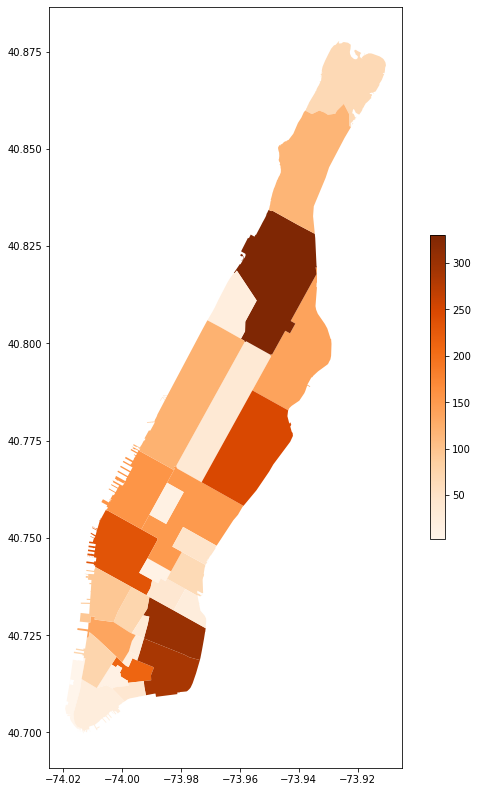

In [66]:
manhattan_gdf.plot(column='graf_cnt', 
                   figsize=(10,14),
                   legend=True,
                   legend_kwds={'shrink': 0.4 },
                  cmap='Oranges')

#### Looking at distribution of reports over time

* Can use the the `CREATED_DATE` variable to look at the distribution of the 311 graffiti complaints over the year

In [67]:
# Add a couple of month variables


graffiti_gdf['month']=pd.to_datetime(graffiti_gdf['Created Date']).dt.month_name()
graffiti_gdf['month_num']=pd.to_datetime(graffiti_gdf['Created Date']).dt.month

In [68]:
graffiti_gdf['month'].value_counts()

March        531
December     362
February     316
January      299
October      270
August       229
June         205
September    205
May          194
April        189
November     187
July         173
Name: month, dtype: int64

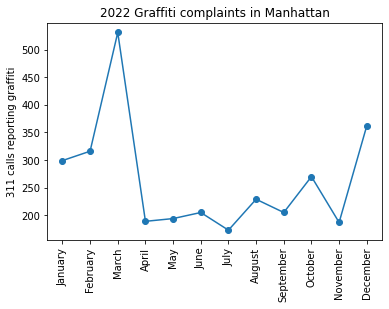

In [69]:
month_names = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September', 'October',
               'November', 'December']

graffiti_gdf.groupby('month_num').size().plot(style='o-')
plt.ylabel('311 calls reporting graffiti')
plt.title('2022 Graffiti complaints in Manhattan')
plt.xticks(range(1,13), month_names, rotation=90)
plt.xlabel('')
plt.show()

* Looking at the year 2022 as a whole, the year roughly starts and begins with the same amount of graffiti complaints filed in Manhattan. In March 2022, there is a large spike in the number of graffiti complaints, increasing from 316 in February to 531 in March. There is a large dip the following month in April, which has only 189 filed complaints. Months April through September remain pretty consistent with the amount of graffiti complaints, with October raising to 270 complaints. After a slight dip to 187 in November, there is a steep rise in graffiti complaints in December, measuring 362 graffiti complaints. 

## 2. Complaints dataset

* Source: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Map-Year-to-Date-/2fra-mtpn


In [70]:
complaint_df = pd.read_csv('../data/manhattan_complaint_data_2022.csv')

In [71]:
complaint_df.shape

(130875, 36)

- WOW... 130,875 reported crime complaints. This is a huge data set, even after the data was condensed to exclude the rows that had errors loading into the notebook

In [72]:
complaint_df.sample(10)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,complaint_date
70246,248221818,07/18/2022,11:04:00,07/18/2022,11:07:00,19,07/18/2022,341,PETIT LARCENY,333,...,NaN,40.779159,-73.954784,"(40.779159, -73.954784)",PATROL BORO MAN NORTH,(null),UNKNOWN,UNKNOWN,D,2022-07-18
8787,239601951,01/24/2022,13:52:00,01/24/2022,14:02:00,14,01/24/2022,235,DANGEROUS DRUGS,511,...,NaN,40.756635,-73.988370,"(40.756635, -73.98837)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E,2022-01-24
1255,238570108,01/03/2022,13:22:00,01/03/2022,13:47:00,9,01/03/2022,341,PETIT LARCENY,333,...,NaN,40.733596,-73.991029,"(40.733596, -73.991029)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,D,2022-01-03
117508,254482484,11/21/2022,11:30:00,11/21/2022,11:45:00,5,11/21/2022,109,GRAND LARCENY,411,...,NaN,40.716223,-73.998127,"(40.716223, -73.998127)",PATROL BORO MAN SOUTH,(null),25-44,ASIAN / PACIFIC ISLANDER,F,2022-11-21
35931,243776374,04/16/2022,20:35:00,04/16/2022,20:45:00,17,04/16/2022,678,MISCELLANEOUS PENAL LAW,201,...,NaN,40.746799,-73.972851,"(40.746799, -73.972851)",PATROL BORO MAN SOUTH,(null),25-44,WHITE HISPANIC,M,2022-04-16
23999,242250187,03/17/2022,18:21:00,NaN,(null),30,03/17/2022,578,HARRASSMENT 2,638,...,NaN,40.825234,-73.942690,"(40.825234, -73.94269)",PATROL BORO MAN NORTH,(null),25-44,WHITE,M,2022-03-17
56911,246399482,06/09/2022,09:30:00,06/09/2022,09:40:00,17,06/09/2022,578,HARRASSMENT 2,638,...,NaN,40.758329,-73.968936,"(40.75832917, -73.96893569)",PATROL BORO MAN SOUTH,(null),25-44,WHITE,F,2022-06-09
115440,255784401,11/12/2022,14:00:00,12/06/2022,18:07:00,6,12/12/2022,341,PETIT LARCENY,301,...,NaN,40.730768,-73.992828,"(40.730768, -73.992828)",PATROL BORO MAN SOUTH,(null),25-44,WHITE,M,2022-11-12
101742,252378407,10/09/2022,12:19:00,10/09/2022,12:25:00,19,10/09/2022,578,HARRASSMENT 2,638,...,NaN,40.766453,-73.952804,"(40.766453, -73.952804)",PATROL BORO MAN NORTH,(null),18-24,WHITE,M,2022-10-09
94461,251460007,09/22/2022,18:20:00,09/22/2022,18:30:00,14,09/22/2022,109,GRAND LARCENY,443,...,NaN,40.753056,-73.996546,"(40.753056, -73.996546)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,D,2022-09-22


I originally thought there was no precinct column for the crime complaints data set. This is why it is so important to analyze each column to make sure you completely understand the data set. Below is what I found:

#### Understanding Each Variable
1. `CMPLNT_NUM` - each complaint is given a different number (likely increasing chronologically) so that thy are uniquely identifiable
2. `ADDR_PCT_CD` - the precinct in which the incident occurred
3. `BORO_NM` - name of the borough
4. `CMPLNT_FR_DT` - date of occurrence for the reported event
5. `CMPLNT_FR_TM` - time of occurrence for the reported event
6. `CMPLNT_TO_DT` - ending date of occurrence for the reported event
7. `CMPLNT_TO_TM` - ending time of occurrence for the reported event
8. `CRM_ATPT_CPTD_CD` - indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
9. `HADEVELOPT` - name of NYCHA housing development of occurrence, if applicable
10. `HOUSING_PSA` - development Level Code
11. `TRANSIT_DISTRICT` - transit district in which the offense occurred
12. `VIC_AGE_GROUP` - victim’s Age Group
13. `VIC_RACE` - victim's race description
14. `VIC_SEX` - victim’s Sex Description
15. `X_COORD_CD` - X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
16. `Y_COORD_CD` - Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
17. `Latitude` - Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
18. `Longitude` - Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
19. `Lat_Lon` - Geospatial Location Point (latitude and Longitude combined)
20. `New Georeferenced Column` - flipped the latitude and longitude coordinates?

See: https://www.opendatanetwork.com/dataset/data.cityofnewyork.us/qgea-i56i

#### Exploring the distribution of values

In [73]:
complaint_df['BORO_NM'].value_counts(dropna=False)

MANHATTAN    130875
Name: BORO_NM, dtype: int64

- Even though we filtered out the 4 other boroughs, it's important to check that nothing slipped through the cracks. Given that 130875 complaints came from Manhattan, and that there are 130875 rows, we can say with certainty that we are only looking at complaints in Manhattan.

In [74]:
complaint_df['CRM_ATPT_CPTD_CD'].value_counts(dropna=False)

COMPLETED    128791
ATTEMPTED      2084
Name: CRM_ATPT_CPTD_CD, dtype: int64

- This shows that the majority of complaints were for completed crimes, yet there is a fraction of instances that are observations of attempted crimes. It makes sense that this was not a column for the graffiti data set because it is much more difficult to catch someone in the act of doing graffiti and it is much easier to complete this crime than other more major ones.

In [75]:
complaint_df['VIC_AGE_GROUP'].value_counts(dropna=False)

UNKNOWN    52911
25-44      38858
45-64      19763
18-24      10590
65+         5883
<18         2861
-934           1
-960           1
-40            1
-65            1
-964           1
-6             1
-3             1
-49            1
-57            1
Name: VIC_AGE_GROUP, dtype: int64

- An overwhelming number of observations do not have a recorded age range. The most common victims were between 25-44 years old, with 38858 reports. It seems like there were small recording errors with the ages that appear as "-3," "-49," and "-57."

In [76]:
complaint_df['VIC_RACE'].value_counts(dropna=False)

UNKNOWN                           54884
WHITE                             22897
BLACK                             21912
WHITE HISPANIC                    17160
ASIAN / PACIFIC ISLANDER           8438
BLACK HISPANIC                     5109
AMERICAN INDIAN/ALASKAN NATIVE      470
(null)                                5
Name: VIC_RACE, dtype: int64

- It appears that similarly to the age column, there is a lot of missing information on the victim's race. The majority of incidents involve white suspects, but there is less than a 1000 person gap between incidents with white and black people. This is disproportionate to the number of white and black people living in Manhattan, so we can draw some conclusions about the NYPD and racial discrimination.

In [77]:
complaint_df['VIC_SEX'].value_counts(dropna=False)

M    40348
F    40028
D    39310
E    10717
L      472
Name: VIC_SEX, dtype: int64

- The division between men and women is pretty evenly split. I see that there are many recordings labeled "D," and a few others under "E" and "L." Just by looking at the random sample of ten observations above, I see that the columns that have many unknown values also have sex labels of "E" and "D." Perhaps these are placeholders for the unknown, or they could represent a lack of precision with the recordings.

#### Mapping the Complaints in Manhattan

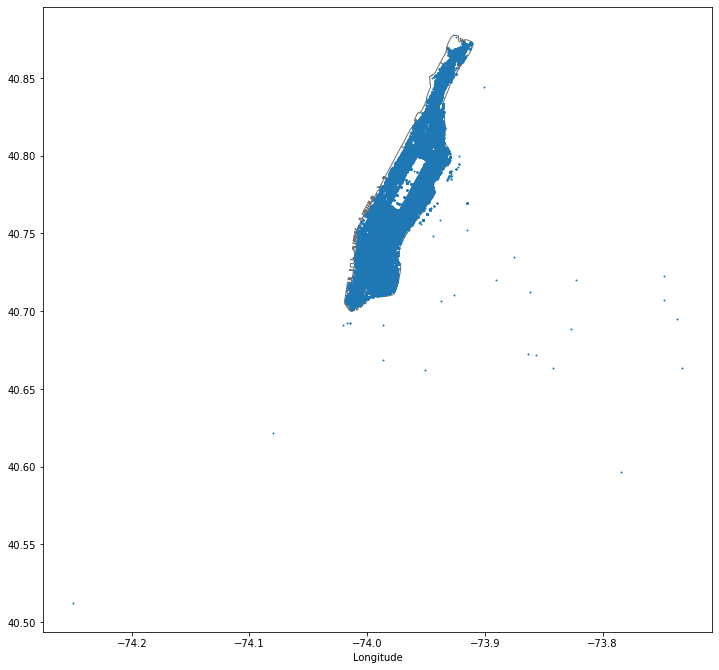

In [78]:
fig, ax = plt.subplots(figsize=(12,16))
base=manhattan_gdf.plot(color='white', edgecolor='#707070', ax=ax)
complaint_df.plot(x='Longitude', y='Latitude', style='.', legend=False, ax=base, markersize=2)
plt.show()

It is extremely difficult to gauge which areas are denser with more NYPD complaints, so I will make a map using shading and gradients based on precincts to allow for easier comparison between the two data sets.

In [79]:
complaint_gdf = gpd.GeoDataFrame(
        complaint_df,
        geometry=gpd.points_from_xy(
            x=complaint_df['Longitude'],
            y=complaint_df['Latitude']))

complaint_gdf=complaint_gdf.set_crs('EPSG:4326')

In [80]:
complaints_by_district_gdf = gpd.sjoin(complaint_gdf,
                              manhattan_gdf)

In [81]:
complaints_by_district_gdf.shape

(129966, 43)

In [82]:
complaints_by_district_cnt = complaints_by_district_gdf.groupby('name').size().reset_index()

In [88]:
complaints_by_district_cnt.columns=['name','complaint_cnt']

In [87]:
manhattan_gdf = manhattan_gdf.merge(complaints_by_district_cnt,
                    left_on='name',
                    right_on='name')

<Axes: >

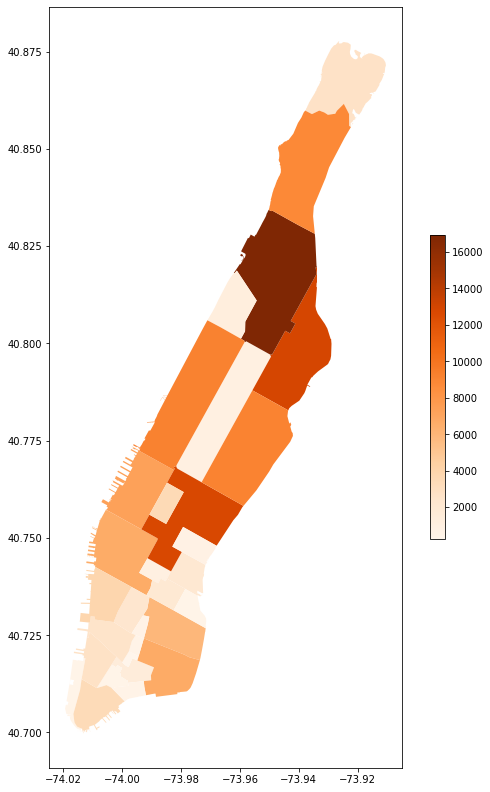

In [89]:
manhattan_gdf.plot(column='complaint_cnt', 
                   figsize=(10,14),
                   legend=True,
                   legend_kwds={'shrink': 0.4 },
                  cmap='Oranges')

#### Using date variables


In [91]:
complaint_df['complaint_date']=pd.to_datetime(complaint_df['CMPLNT_FR_DT'])

In [92]:
complaint_df['complaint_date'].dt.month.value_counts()

6     12070
7     11707
5     11705
8     11505
10    11393
9     11379
3     11264
4     10897
11    10556
2      9819
12     9384
1      9196
Name: complaint_date, dtype: int64

### 3. Protected streets dataset

In [93]:
protected_gdf = gpd.read_file('../data/manhattan_protected_streets.geojson')

In [94]:
# look at shape of data
protected_gdf.shape

(3015, 11)

In [95]:
# describe columns
protected_gdf.columns

Index(['the_geom', 'OBJECTID', 'OFTCode', 'GeoBoroughCode', 'OnstreetName',
       'FromStreet', 'ToStreetName', 'DateProtectedFrom', 'DateProtectedTo',
       'Shape.STLength()', 'geometry'],
      dtype='object')

* Look at distribution of streets through a plot

<Axes: >

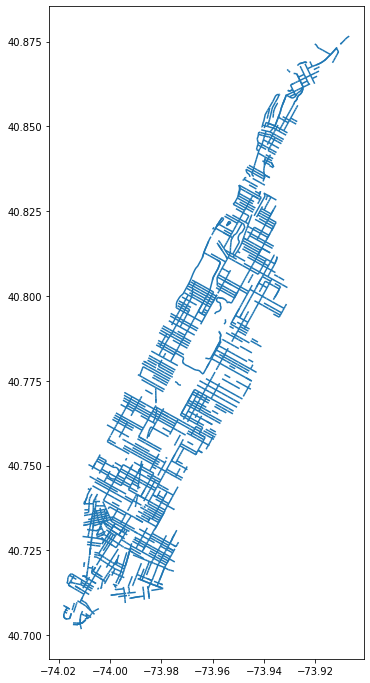

In [96]:
protected_gdf.plot(figsize=(10,12))

* Combined with Manhattan neighborhood map

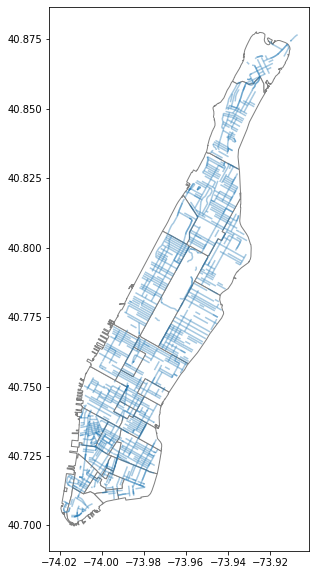

In [97]:
base= manhattan_gdf.plot(color='white', 
                         edgecolor='gray',
                         figsize=(8,10))

protected_gdf.plot(ax=base, alpha=0.4)

plt.show()

* Use spatial join to count the number of protected streets per district

In [98]:
protected_cnt = gpd.sjoin(manhattan_gdf,
          protected_gdf).groupby('name').size().rename('protected_cnt').reset_index()

protected_cnt

,name,protected_cnt
0,Battery Park City,36
1,Central Park,97
2,Chelsea,139
3,Chinatown,35
4,Civic Center,15
5,East Harlem,182
6,East Village,153
7,Financial District,76
8,Flatiron District,33
9,Gramercy,47


In [99]:
manhattan_gdf=manhattan_gdf.merge(protected_cnt)